In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.insert(1, 'scripts/')
from gen_matrix import matrix_gen, get_ICA
from get_sample import get_sample, create_strings_for_dataset
from fft import fft_for_sample
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
EEG = matrix_gen()
ICA = get_ICA()

class_ = 20000//3
class1 = [0,class_]
class2 = [class_,class_*2]
class3 = [class_*2, EEG.shape[1]]

print(class1, class2, class3)

[0, 6666] [6666, 13332] [13332, 19998]


In [3]:
#Перемножаем ICA и EEG матрицы
matrix = np.matmul(ICA, EEG)
#Разбиваем на матрицы классов, чтоб проще было делить на семплы
matrix_class1 = matrix[:,0:class_]
matrix_calss2 = matrix[:, class_:class_*2]
matrix_calss3 = matrix[:, class_*2:EEG.shape[1]]

In [4]:
#Получаю семплы для каждого класса
sample_calss1 = get_sample(matrix_class1)
sample_calss2 = get_sample(matrix_calss2)
sample_calss3 = get_sample(matrix_calss3)

In [5]:
print(len(sample_calss1), len(sample_calss2), len(sample_calss3))

34 34 34


In [17]:
#Преобразование Фурье
samples_fft = list(map(abs, fft_for_sample(sample_calss1 + sample_calss2 + sample_calss3, first_n_elements=20)))

In [18]:
sample_calss1_fft = samples_fft[:34]
sample_calss2_fft = samples_fft[34:34*2]
sample_calss3_fft = samples_fft[34*2:]

print(len(sample_calss1_fft), len(sample_calss2_fft), len(sample_calss3_fft))

34 34 34


In [6]:
#Преобразование Фурье
# sample_calss1_fft = fft_for_sample(sample_calss1, first_n_elements=20)
# sample_calss2_fft = fft_for_sample(sample_calss2, first_n_elements=20)
# sample_calss3_fft = fft_for_sample(sample_calss3, first_n_elements=20)

In [23]:
#Создание строк для датасета, из матрицы 128*20 -> в вектор 2560
sample_calss1_fft_str = create_strings_for_dataset(sample_calss1_fft)
sample_calss2_fft_str = create_strings_for_dataset(sample_calss2_fft)
sample_calss3_fft_str = create_strings_for_dataset(sample_calss3_fft)

In [24]:
#Создание таблицы объекты-признаки

#Класс 1
data_class_1 = pd.DataFrame(data=np.zeros((34, 2560)))
data_class_1['label'] = 1

for i in tqdm(range(len(sample_calss1_fft_str))):
    data_class_1.loc[i, :-1] = sample_calss1_fft_str[i]
    
    
#Класс 2
data_class_2 = pd.DataFrame(data=np.zeros((34, 2560)))
data_class_2['label'] = 2

for i in tqdm(range(len(sample_calss2_fft_str))):
    data_class_2.loc[i, :-1] = sample_calss2_fft_str[i]
    
    
#Класс 3
data_class_3 = pd.DataFrame(data=np.zeros((34, 2560)))
data_class_3['label'] = 3

for i in tqdm(range(len(sample_calss3_fft_str))):
    data_class_3.loc[i, :-1] = sample_calss3_fft_str[i]
    
    
data = pd.concat([data_class_1, data_class_2, data_class_3], axis=0)
print(data.shape)
data.head(5)

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


HBox(children=(IntProgress(value=0, max=34), HTML(value='')))

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


HBox(children=(IntProgress(value=0, max=34), HTML(value='')))

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


HBox(children=(IntProgress(value=0, max=34), HTML(value='')))


(102, 2561)


,0,1,2,3,4,5,6,7,8,9,...,2551,2552,2553,2554,2555,2556,2557,2558,2559,label
0,398.376444,405.482560,404.270590,398.738976,390.879508,400.137091,407.450122,400.077992,401.008205,389.644378,...,0.154381,0.167972,0.216703,0.185896,0.238187,0.151923,0.245607,0.182144,0.111644,1
1,398.357465,405.595486,404.332621,398.815872,390.877297,400.142469,407.491607,400.081691,400.946532,389.657238,...,0.137514,0.074546,0.062308,0.130045,0.045252,0.116501,0.082873,0.133495,0.227900,1
2,398.370813,405.634120,404.377120,398.935752,390.914515,400.171913,407.576094,400.177941,400.991198,389.719289,...,0.262433,0.255909,0.238187,0.225266,0.240140,0.312893,0.287069,0.348151,0.305104,1
3,398.300739,405.474094,404.295854,398.832321,390.876563,400.168028,407.512084,400.168102,400.966513,389.681390,...,0.092657,0.101330,0.108091,0.044705,0.064508,0.172941,0.099706,0.179110,0.107102,1
4,398.540507,405.699323,404.526656,398.972909,391.096513,400.376305,407.758173,400.370538,401.215012,389.909423,...,0.258330,0.207752,0.265743,0.238662,0.271957,0.296357,0.280276,0.294797,0.230614,1


In [25]:
#Понизим размерность до 60 компонент
PCA = PCA(n_components=60)
data_pca = PCA.fit_transform((data).iloc[:, :-1])

In [26]:
data_pca = pd.DataFrame(data_pca)
# data_pca['label'] = data['label'].values
labels = data['label'].values

In [82]:
#Обучим LDA
LDA = LDA()
LDA.fit(data_pca, labels)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [28]:
#Посмотрим важные признаки с помощью RF
rf = RandomForestClassifier()
rf.fit(data_pca, labels)

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

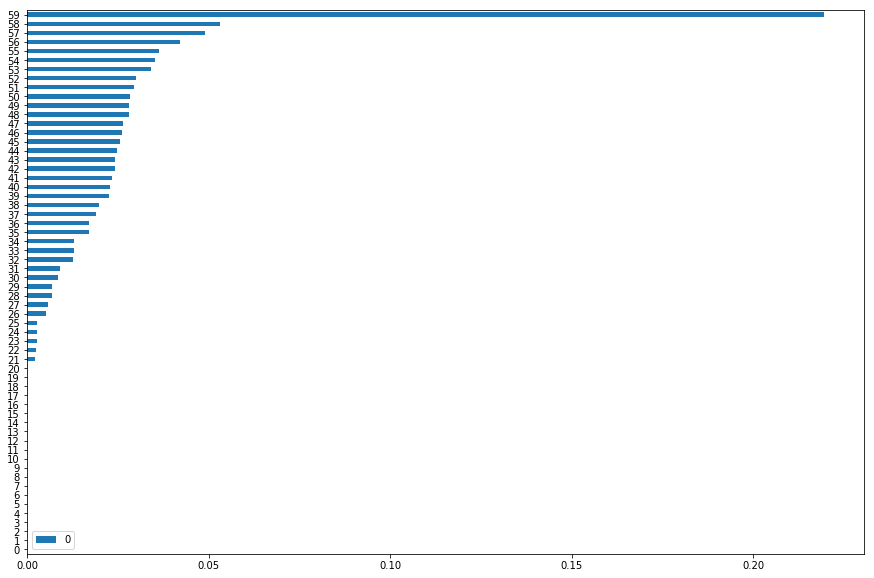

In [29]:
pd.DataFrame(sorted(rf.feature_importances_)).plot(kind='barh', figsize=(15,10))